In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd

In [3]:
path_to_kin_folder = r"C:\Niloofar\SCR\posture-prediction-models-main\external_data_processing\outputs\transformer_arm_with_kinematic_constraints"
path_to_without_kin_folder = r"C:\Niloofar\SCR\posture-prediction-models-main\external_data_processing\outputs\transformer_arm"
path_to_true = r"C:\Niloofar\SCR\posture-prediction-models-main\external_data_processing\outputs\transformer_arm_true"

In [4]:
kin_dict = {}
for item in os.listdir(path_to_kin_folder):
    selected_df = pd.read_csv(os.path.join(path_to_kin_folder, item)).drop(columns=['Unnamed: 0']).to_numpy()
    kin_dict[item.split('.')[0]] = selected_df

In [5]:
without_kin_dict = {}
for item in os.listdir(path_to_without_kin_folder):
    selected_df = pd.read_csv(os.path.join(path_to_without_kin_folder, item)).drop(columns=['Unnamed: 0']).to_numpy()
    without_kin_dict[item.split('.')[0]] = selected_df

In [6]:
true_dict = {}
for item in os.listdir(path_to_true):
    selected_df = pd.read_csv(os.path.join(path_to_true, item)).drop(columns=['Unnamed: 0']).to_numpy()
    true_dict[item.split('.')[0]] = selected_df

In [7]:
class DataVisualizer:
    def __init__(self, kin_dict, without_kin_dict, true_dict):
        """
        Initialize the visualizer with dictionaries containing the data.
        kin_dict, without_kin_dict, true_dict: Dictionaries containing the data for plotting.
        """
        self.kin_dict = kin_dict
        self.without_kin_dict = without_kin_dict
        self.true_dict = true_dict
        
        # Define the colors explicitly using HEX codes
        self.color_blue = '#1f77b4'  # Blue for Kinematic Constraints
        self.color_red = '#ff7f0e'   # Red for No Kinematic Constraints
        self.color_green = '#2ca02c' # Green for True

    def plot_kde(self, segment_pred, segment_true, figsize=(10, 6)):
        """
        Plot KDE for the specified segment.
        segment: The key for accessing the specific data (e.g., 'left_shank_sub_1_pred').
        figsize: The size of the plot.
        """
        plt.figure(figsize=figsize)

        # Ensure the data is converted to numpy arrays if necessary
        sns.kdeplot(self.kin_dict[segment_pred], color=self.color_blue, label='Predicted (Kinematic Constraints)', linewidth=2, linestyle='-')
        sns.kdeplot(self.without_kin_dict[segment_pred], color=self.color_red, label='Predicted (No Kinematic Constraints)', linewidth=2, linestyle='--')
        sns.kdeplot(self.true_dict[segment_true], color=self.color_green, label='True', linewidth=2, linestyle=':')

        plot_name_split = segment_pred.split('_')[0: -1]
        plot_name = '_'.join(plot_name_split)


        # Adding labels, title, and legend
        plt.title(f'KDE Comparison of {plot_name}')
        plt.xlabel('Segment Length (mm)')
        plt.ylabel('Density')
        plt.legend()

        # Show the plot
        plt.show()

    def plot_line(self, segment_pred, segment_true, figsize=(10, 6)):
        """
        Plot line graph for the specified segment.
        segment: The key for accessing the specific data (e.g., 'left_shank_sub_1_pred').
        figsize: The size of the plot.
        """
        plt.figure(figsize=figsize)

        # Plotting the line graphs for the segment
        plt.plot(self.kin_dict[segment_pred], color=self.color_green, label='Predicted (Kinematic Constraints)')
        plt.plot(self.without_kin_dict[segment_pred], color=self.color_blue, label='Predicted (No Kinematic Constraints)')
        plt.plot(self.true_dict[segment_true], color=self.color_red, label='True')

        plot_name_split = segment_pred.split('_')[0: -1]
        plot_name = '_'.join(plot_name_split)

        # Adding labels, title, and legend
        plt.title(f'Line Plot Comparison of {plot_name}')
        plt.xlabel('Time Steps')
        plt.ylabel('Segment Length (mm)')
        plt.legend()

        # Show the plot
        plt.show()

    def show_plot(self, plot_type, segment_pred, segment_true, figsize=(10, 6)):
        """
        Display the requested plot type (KDE or Line) for a given segment.
        plot_type: Either 'kde' or 'line' to specify which plot to show.
        segment: The segment to plot (e.g., 'left_shank_sub_1_pred').
        figsize: The size of the plot.
        """
        if plot_type == 'kde':
            self.plot_kde(segment_pred, segment_true, figsize)
        elif plot_type == 'line':
            self.plot_line(segment_pred, segment_true, figsize)
        else:
            raise ValueError("Invalid plot type. Choose either 'kde' or 'line'.")
        


    def calculate_stats(self, segment_pred, segment_true):
        """
        Calculate the mean and standard deviation for the three signals (predicted, true, and without constraints).
        segment_pred: The key for accessing the predicted data (e.g., 'left_shank_sub_1_pred').
        segment_true: The key for accessing the true data (e.g., 'left_shank_sub_1_true').
        Returns a dictionary with the mean and std for the three signals.
        """
        stats = {}

        # Calculate mean and std for the three signals
        kin_mean = np.mean(self.kin_dict[segment_pred])
        kin_std = np.std(self.kin_dict[segment_pred])

        without_kin_mean = np.mean(self.without_kin_dict[segment_pred])
        without_kin_std = np.std(self.without_kin_dict[segment_pred])

        true_mean = np.mean(self.true_dict[segment_true])
        true_std = np.std(self.true_dict[segment_true])

        # Store the results in a dictionary
        stats['Predicted (Kinematic Constraints)'] = {'mean': kin_mean, 'std': kin_std}
        stats['Predicted (No Kinematic Constraints)'] = {'mean': without_kin_mean, 'std': without_kin_std}
        stats['True'] = {'mean': true_mean, 'std': true_std}

        # Print the stats for all three signals
        print(f"Stats for {segment_pred} vs {segment_true}:")
        print(f"Predicted (Kinematic Constraints): Mean = {kin_mean:.2f}, Std = {kin_std:.2f}")
        print(f"Predicted (No Kinematic Constraints): Mean = {without_kin_mean:.2f}, Std = {without_kin_std:.2f}")
        print(f"True: Mean = {true_mean:.2f}, Std = {true_std:.2f}")

        return stats



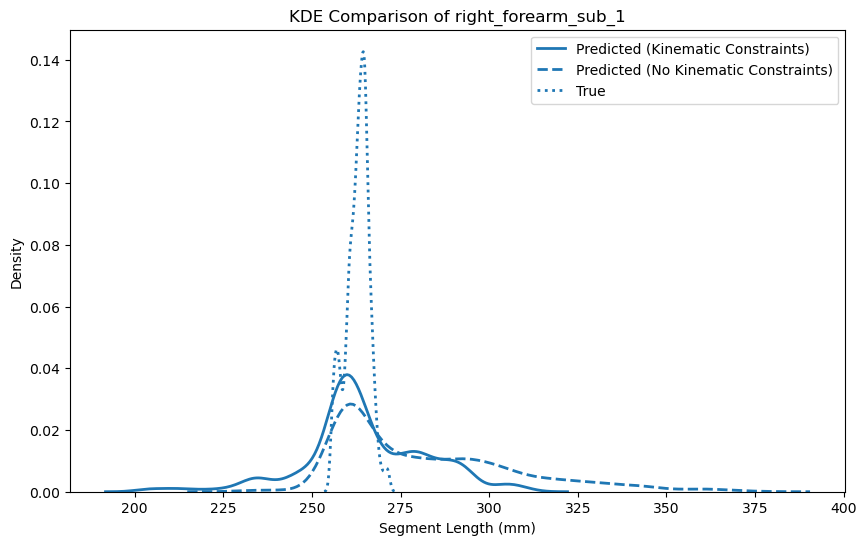

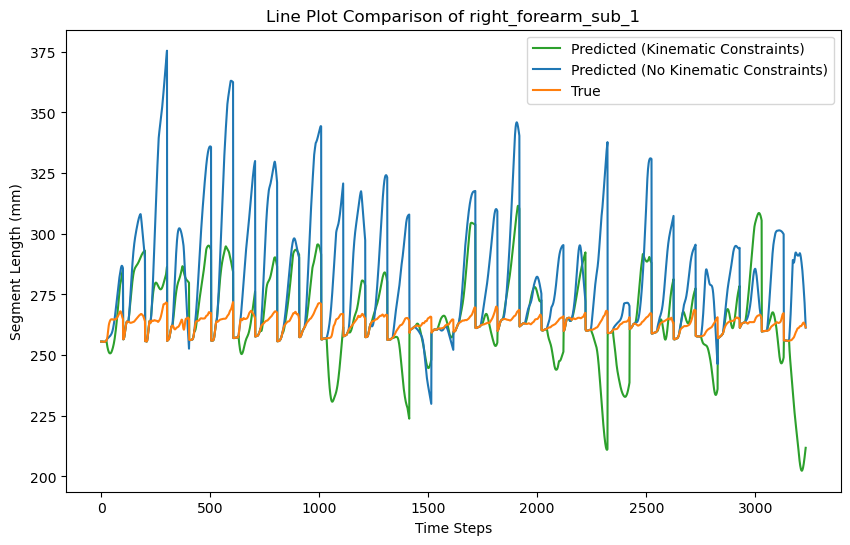

Stats for right_forearm_sub_1_pred vs right_forearm_sub_1_true:
Predicted (Kinematic Constraints): Mean = 264.88, Std = 17.72
Predicted (No Kinematic Constraints): Mean = 281.39, Std = 25.28
True: Mean = 262.89, Std = 3.29


In [8]:
visualizer = DataVisualizer(kin_dict, without_kin_dict, true_dict)


visualizer.show_plot('kde', 'right_forearm_sub_1_pred', 'right_forearm_sub_1_true')


visualizer.show_plot('line', 'right_forearm_sub_1_pred', 'right_forearm_sub_1_true')

stats = visualizer.calculate_stats('right_forearm_sub_1_pred', 'right_forearm_sub_1_true')

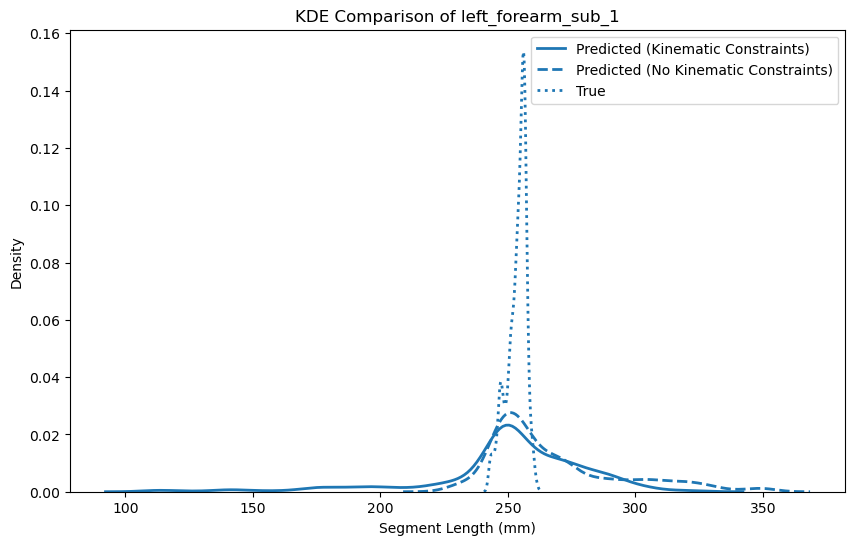

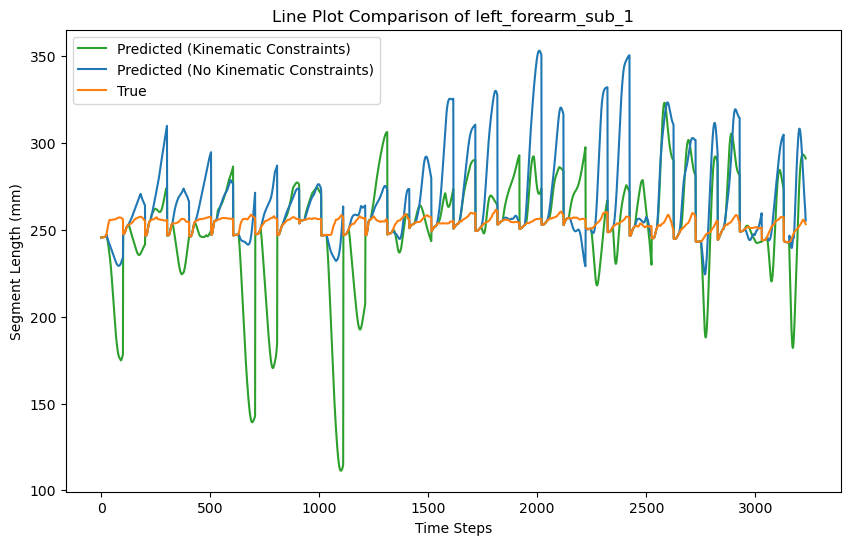

Stats for left_forearm_sub_1_pred vs left_forearm_sub_1_true:
Predicted (Kinematic Constraints): Mean = 250.93, Std = 31.96
Predicted (No Kinematic Constraints): Mean = 267.12, Std = 25.86
True: Mean = 253.53, Std = 3.83


In [9]:
visualizer = DataVisualizer(kin_dict, without_kin_dict, true_dict)


visualizer.show_plot('kde', 'left_forearm_sub_1_pred', 'left_forearm_sub_1_true')


visualizer.show_plot('line', 'left_forearm_sub_1_pred', 'left_forearm_sub_1_true')

stats = visualizer.calculate_stats( 'left_forearm_sub_1_pred', 'left_forearm_sub_1_true')

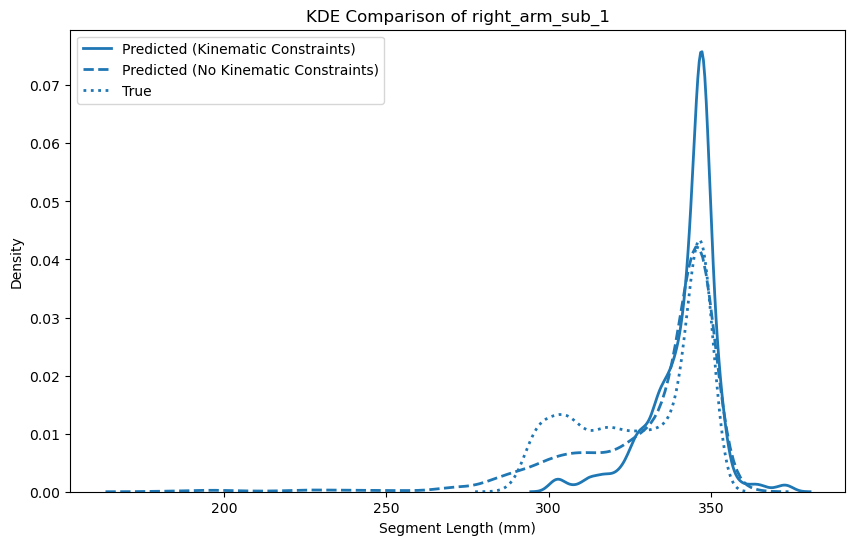

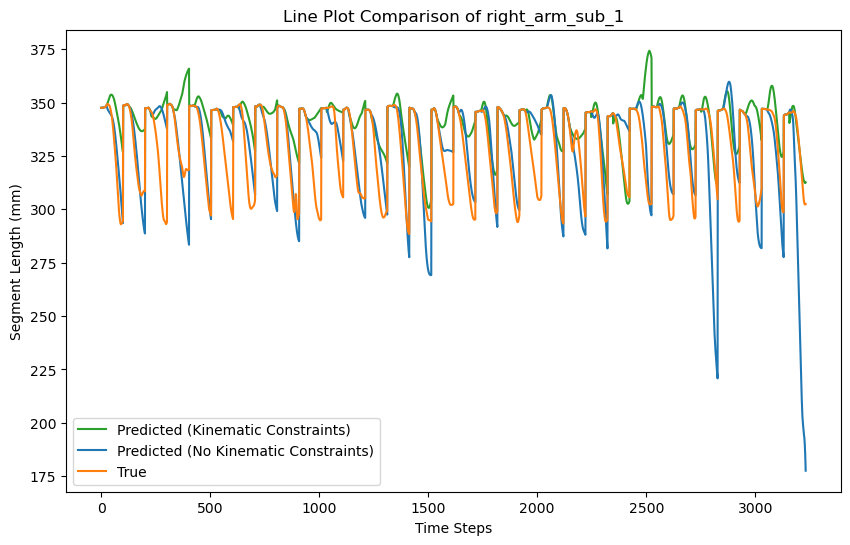

Stats for right_arm_sub_1_pred vs right_arm_sub_1_true:
Predicted (Kinematic Constraints): Mean = 342.19, Std = 10.40
Predicted (No Kinematic Constraints): Mean = 331.38, Std = 23.67
True: Mean = 329.28, Std = 18.58


In [10]:
visualizer = DataVisualizer(kin_dict, without_kin_dict, true_dict)


visualizer.show_plot('kde', 'right_arm_sub_1_pred', 'right_arm_sub_1_true')


visualizer.show_plot('line', 'right_arm_sub_1_pred', 'right_arm_sub_1_true')

stats = visualizer.calculate_stats( 'right_arm_sub_1_pred', 'right_arm_sub_1_true')

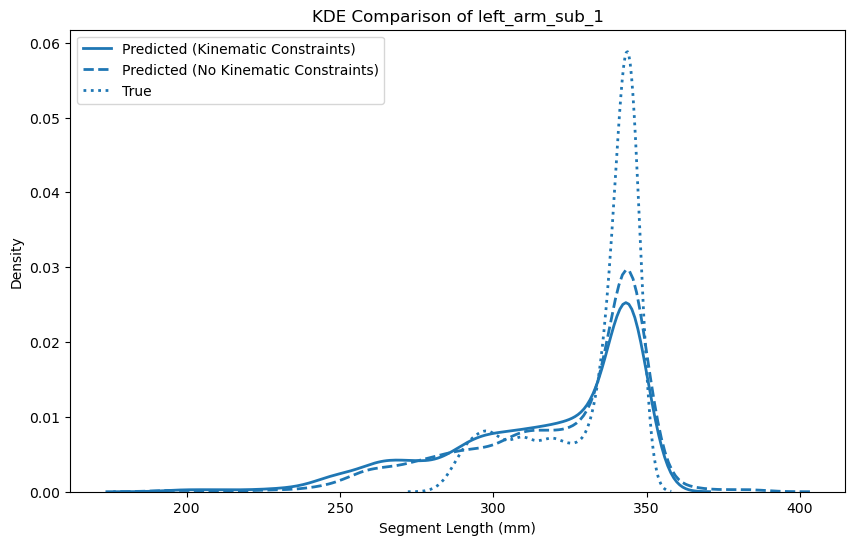

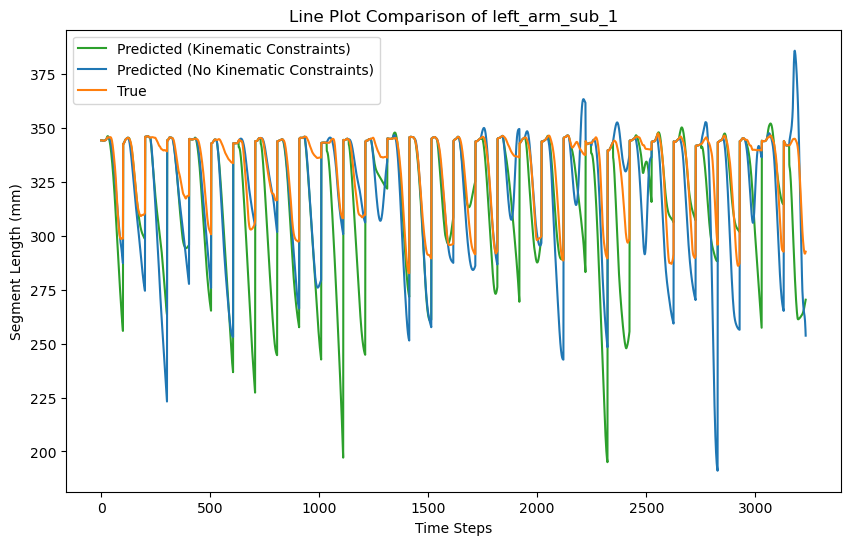

Stats for left_arm_sub_1_pred vs left_arm_sub_1_true:
Predicted (Kinematic Constraints): Mean = 316.67, Std = 30.99
Predicted (No Kinematic Constraints): Mean = 321.53, Std = 29.33
True: Mean = 331.61, Std = 17.63


In [11]:
visualizer = DataVisualizer(kin_dict, without_kin_dict, true_dict)


visualizer.show_plot('kde', 'left_arm_sub_1_pred', 'left_arm_sub_1_true')


visualizer.show_plot('line', 'left_arm_sub_1_pred', 'left_arm_sub_1_true')

stats = visualizer.calculate_stats( 'left_arm_sub_1_pred', 'left_arm_sub_1_true')

In [ ]:
visualizer = DataVisualizer(kin_dict, without_kin_dict, true_dict)


visualizer.show_plot('kde', 'right_forearm_sub_2_pred', 'right_forearm_sub_2_true')


visualizer.show_plot('line', 'right_forearm_sub_2_pred', 'right_forearm_sub_2_true')

stats = visualizer.calculate_stats( 'right_forearm_sub_2_pred', 'right_forearm_sub_2_true')

In [ ]:
visualizer = DataVisualizer(kin_dict, without_kin_dict, true_dict)


visualizer.show_plot('kde', 'left_forearm_sub_2_pred', 'left_forearm_sub_2_true')


visualizer.show_plot('line', 'left_forearm_sub_2_pred', 'left_forearm_sub_2_true')

stats = visualizer.calculate_stats('left_forearm_sub_2_pred', 'left_forearm_sub_2_true')

In [ ]:
visualizer = DataVisualizer(kin_dict, without_kin_dict, true_dict)


visualizer.show_plot('kde', 'right_arm_sub_2_pred', 'right_arm_sub_2_true')


visualizer.show_plot('line', 'right_arm_sub_2_pred', 'right_arm_sub_2_true')

stats = visualizer.calculate_stats('right_arm_sub_2_pred', 'right_arm_sub_2_true')

In [ ]:
visualizer = DataVisualizer(kin_dict, without_kin_dict, true_dict)


visualizer.show_plot('kde', 'left_arm_sub_2_pred', 'left_arm_sub_2_true')


visualizer.show_plot('line', 'left_arm_sub_2_pred', 'left_arm_sub_2_true')

stats = visualizer.calculate_stats('left_arm_sub_2_pred', 'left_arm_sub_2_true')

In [17]:
from scipy.stats import entropy
import numpy as np

kl_div_kin_true = {}
kl_div_without_kin_true = {}

for key in true_dict.keys():
    true_dist = true_dict[key].flatten()


    temp_list = key.split('_')[0: -1]
    pred_key = '_'.join(temp_list) + '_pred'

    kin_dist = kin_dict[pred_key].flatten()
    without_kin_dist = without_kin_dict[pred_key].flatten()

    # Convert arrays to probability distributions by normalizing
    true_dist_prob = true_dist / np.sum(true_dist)
    kin_dist_prob = kin_dist / np.sum(kin_dist)
    without_kin_dist_prob = without_kin_dist / np.sum(without_kin_dist)

    # Calculate KL divergence (KL(true || kin))
    kl_div_kin_true[key] = entropy(true_dist_prob, kin_dist_prob)

    # Calculate KL divergence (KL(true || without_kin))
    kl_div_without_kin_true[key] = entropy(true_dist_prob, without_kin_dist_prob)

# Example of accessing calculated divergences
print("KL Divergence between kin_dict and true_dict:", kl_div_kin_true)
print("KL Divergence between without_kin_dict and true_dict:", kl_div_without_kin_true)


KL Divergence between kin_dict and true_dict: {'left_arm_sub_1_true': 0.002968667286533123, 'left_forearm_sub_1_true': 0.009819280844453524, 'right_arm_sub_1_true': 0.0011158811284417642, 'right_forearm_sub_1_true': 0.0019951597069440556}
KL Divergence between without_kin_dict and true_dict: {'left_arm_sub_1_true': 0.0022085568714698134, 'left_forearm_sub_1_true': 0.003762788864098296, 'right_arm_sub_1_true': 0.0017334807507312687, 'right_forearm_sub_1_true': 0.0031256902859351137}


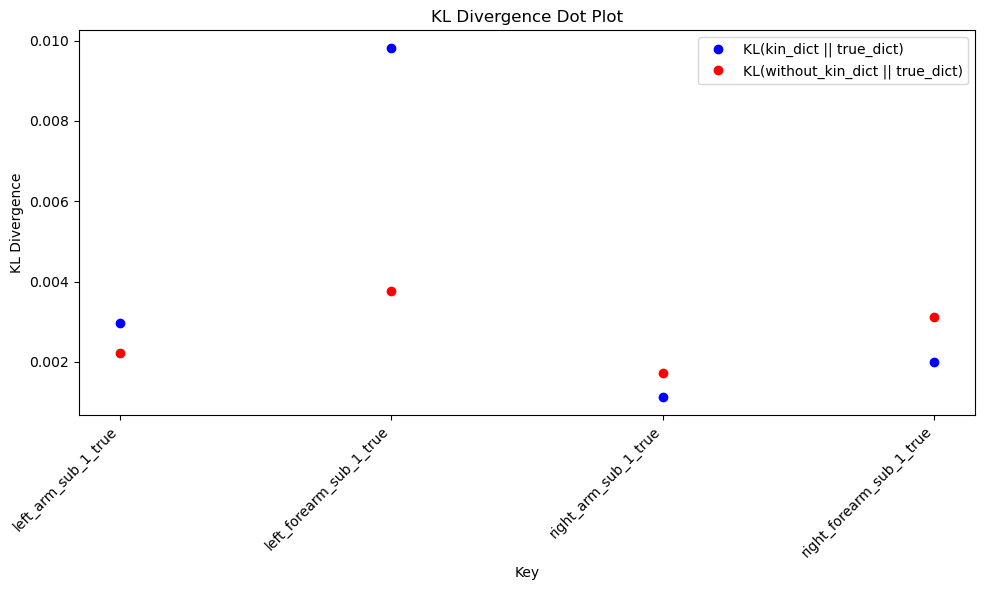

In [18]:
# Plot KL Divergence between kin_dict and true_dict using a dot plot
plt.figure(figsize=(10, 6))
plt.plot(list(kl_div_kin_true.keys()), list(kl_div_kin_true.values()), 'bo', label='KL(kin_dict || true_dict)')
plt.plot(list(kl_div_without_kin_true.keys()), list(kl_div_without_kin_true.values()), 'ro', label='KL(without_kin_dict || true_dict)')
plt.xlabel('Key')
plt.ylabel('KL Divergence')
plt.title('KL Divergence Dot Plot')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

